In [129]:
import numpy as np
import matplotlib.pyplot as plt
from hlsf.models import LSF_DATA
from scipy import interpolate
%matplotlib inline

In [130]:
config = 'H'
lamp = 'Ar'

In [131]:
lsf_data = LSF_DATA(f"../exposures/ARC-{lamp}_CLEAR_20MAS_{config}_PRM.fits", f"../text/{lamp}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", slice=19, normal='Normal')
lsf_data.get_line_list()

{250: 15046.5, 251: 15172.69, 252: 15989.49, 253: 16519.86, 254: 16940.58}

In [132]:
array_waves = np.empty(0, dtype=float)
array_intensity = np.empty(0, dtype=float)
array_pos = np.empty(0, dtype=float)
for nb_line in lsf_data.get_line_list().keys(): 
    data = lsf_data.get_data_line(nb_line, step=10)
    pos = data['map_wave']-data['waveline']
    intensity = data['intensity']
    array_pos = np.concatenate((array_pos, pos))
    array_waves = np.concatenate((array_waves, np.full_like(pos, data['waveline'])))
    array_intensity = np.concatenate((array_intensity, intensity))
array_intensity.shape

(399,)

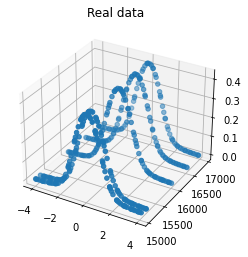

In [133]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(array_pos, array_waves, array_intensity)
plt.title('Real data')
plt.show()

In [134]:
x = np.arange(min(array_pos), max(array_pos), step=1e-2)
y = np.arange(min(array_waves), max(array_waves), 100)
grid_x, grid_y = np.meshgrid(x, y)
grid_y

array([[15046.5, 15046.5, 15046.5, ..., 15046.5, 15046.5, 15046.5],
       [15146.5, 15146.5, 15146.5, ..., 15146.5, 15146.5, 15146.5],
       [15246.5, 15246.5, 15246.5, ..., 15246.5, 15246.5, 15246.5],
       ...,
       [16646.5, 16646.5, 16646.5, ..., 16646.5, 16646.5, 16646.5],
       [16746.5, 16746.5, 16746.5, ..., 16746.5, 16746.5, 16746.5],
       [16846.5, 16846.5, 16846.5, ..., 16846.5, 16846.5, 16846.5]])

In [135]:
grid_z0 = interpolate.griddata(np.array([array_pos, array_waves]).T, array_intensity, (grid_x, grid_y), method='cubic')
grid_z0

array([[0.00248044, 0.00249955, 0.00251888, ...,        nan,        nan,
               nan],
       [       nan, 0.00251713, 0.00253715, ..., 0.00316631, 0.00311537,
               nan],
       [       nan, 0.0025246 , 0.00255584, ..., 0.00324424, 0.00324183,
        0.00322233],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

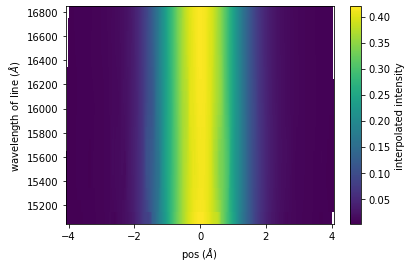

In [136]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel(r'pos ($\AA$)')
ax.set_ylabel(r'wavelength of line ($\AA$)')
c = ax.pcolormesh(x, y, grid_z0[:-1, :-1])
plt.colorbar(c, ax=ax, label='interpolated intensity')
plt.show()